In [43]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [44]:
pip install plot-keras-history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from plot_keras_history import show_history, plot_history


In [46]:
#Reading dataset
def read_dataset():
  df = pd.read_csv("/content/drive/MyDrive/bank_notes.csv")
  #Print columns
  X = df[df.columns[0:4]].values
  y = df[df.columns[4]]

  #Encode dependent variable
  encoder = LabelEncoder()
  encoder.fit(y)
  y = encoder.transform(y)
  Y = one_hot_encode(y)
  print(X.shape)
  return (X,Y)

#Define encoder function
def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels = len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels, n_unique_labels))
  one_hot_encode[np.arange(n_labels), labels] = 1
  return one_hot_encode

In [47]:
#Read dataset
X, Y = read_dataset()

#Shuffle the dataset to mix up the rows
X, Y = shuffle(X, Y, random_state=1)

#Convert dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

#Inspect the shape of the training and testing data
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1372, 4)
(1097, 4)
(1097, 2)
(275, 4)
(275, 2)


In [48]:
#Define the important parameters and variable to work with tensors
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "C:\\Users"

n_dim 4


In [49]:
#Define number of hidden layers and number of neurons for each layer
n_hidden_1 = 10
n_hidden_2 = 10
n_hidden_3 = 10
n_hidden_4 = 10

x = tf.placeholder(tf.float32, [None,n_dim])
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [50]:
#Define the model
def multilayer_perceptron(x, weights, biases):
	# Hidden layer with RELU activation

	layer_1 = tf.add(tf.matmul(x, weights['h1']),biases['b1'])
	layer_1 = tf.nn.relu(layer_1)

	#Hidden layer with relu activation
	layer_2 = tf.add(tf.matmul(layer_1, weights['h2']),biases['b2'])
	layer_2 = tf.nn.relu(layer_2)

	#Hidden layer with relu activation
	layer_3 = tf.add(tf.matmul(layer_2, weights['h3']),biases['b3'])
	layer_3 = tf.nn.relu(layer_3)

	#Hidden layer with relu activation
	layer_4 = tf.add(tf.matmul(layer_3, weights['h4']),biases['b4'])
	layer_4 = tf.nn.relu(layer_4)

	#Output layer with sigmoid activation
	out_layer = tf.matmul(layer_4, weights['out'])+biases['out']
	out_layer = tf.nn.sigmoid(out_layer)
	return out_layer


In [51]:
#Define the weights and the biases for each layer

weights = {
	'h1':tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
	'h2':tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
	'h3':tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
	'h4':tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
	'out':tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
	'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
	'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
	'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
	'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
	'out':tf.Variable(tf.truncated_normal([n_class])),
}

In [52]:
#Initialize the variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

#call your model defined
y = multilayer_perceptron(x, weights, biases)

#Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_steps = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

In [53]:
#Calculate the cost and accuracy for epoch

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
	sess.run(training_steps, feed_dict={x:train_x, y_:train_y})
	cost = sess.run(cost_function, feed_dict={x:train_x, y_:train_y})
	cost_history = np.append(cost_history, cost)
	correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
	accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

	#print("Accuracy:", (sess.run(accuracy, feed_dict={x:test_x, y:test_y})))
	pred_y = sess.run(y, feed_dict={x: test_x})
	mse = tf.reduce_mean(tf.square(pred_y - test_y))
	mse_ = sess.run(mse)
	mse_history.append(mse_)
	accuracy = (sess.run(accuracy, feed_dict={x:train_x, y_:train_y}))
	accuracy_history.append(accuracy)

	print('epoch : ', epoch, '-', 'cost : ',cost, " - MSE : ",mse_, "- Train Accuracy : ", accuracy)

save_path = saver.save(sess, model_path)
print("Model saved in file : %s" % save_path)

epoch :  0 - cost :  0.7001646  - MSE :  0.4239208262060193 - Train Accuracy :  0.5013674
epoch :  1 - cost :  0.69248116  - MSE :  0.41963990384202804 - Train Accuracy :  0.50592524
epoch :  2 - cost :  0.690267  - MSE :  0.418236995025347 - Train Accuracy :  0.50592524
epoch :  3 - cost :  0.68770283  - MSE :  0.4176906550777279 - Train Accuracy :  0.50683683
epoch :  4 - cost :  0.685397  - MSE :  0.41676274468443913 - Train Accuracy :  0.50683683
epoch :  5 - cost :  0.68436724  - MSE :  0.41586212826432706 - Train Accuracy :  0.50683683
epoch :  6 - cost :  0.68307114  - MSE :  0.41519481133102 - Train Accuracy :  0.50957155
epoch :  7 - cost :  0.68197006  - MSE :  0.41498076896259095 - Train Accuracy :  0.50957155
epoch :  8 - cost :  0.6812186  - MSE :  0.4148294207539915 - Train Accuracy :  0.51139474
epoch :  9 - cost :  0.68042517  - MSE :  0.4145050369444171 - Train Accuracy :  0.5123063
epoch :  10 - cost :  0.6792941  - MSE :  0.4128811853607872 - Train Accuracy :  0.5168

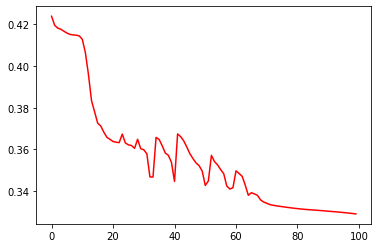

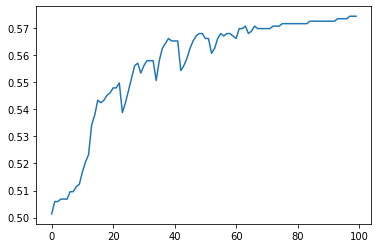

Test Accuracy :  0.5781818
MSE : 0.3291


In [54]:
#plot mse and accuracy graph

plt.plot(mse_history, "r")
plt.show()
plt.plot(accuracy_history)
plt.show()

#Print the final accuracy

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy : ", (sess.run(accuracy, feed_dict={x:test_x, y_:test_y})))

#print the final mean square error

pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE : %.4f"%sess.run(mse))